In [12]:
# !pip install matplotlib

In [1]:
# 기분 텍스트를 빈도 수로 추출

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline
#시각화 결과가 선명하게 표시되도록
%config InlindBackend.figure_format = 'retina'


In [2]:
# 윈도우 한글폰트 설정
plt.rc("font", family="Malgun Gothic")
# mac 한글폰트 설정
# plt.rc("font", family="AppleGothic")
plt.rc('axes', unicode_minus=False)

In [3]:
# 크롤링한 파일 로드하기
# df = pd.read_csv("./textdata/신나는음악.csv", encoding='euc-kr')
df = pd.read_csv("./총데이터.csv")
df.shape

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15044\2994002339.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./총데이터.csv")


(218430, 4)

In [4]:
df.head()

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
# 데이터 전처리
# 네트워크 오류 등으로 발생한 중복 입력값을 제거
# 빈도 수 중복 방지

print(df.shape)
df = df.drop_duplicates(['document'], keep="last")
print(df.shape)

(218430, 4)
(212692, 4)


In [7]:
df = df.dropna(subset=['document'], how='any', axis=0)

In [8]:
# 원본 보존
df['origin_document'] = df["document"]

In [9]:
# 소문자 변환
df["document"] = df["document"].str.lower()

In [11]:
# 같은 의미의 단어를 하나로 통일 ex. python -> 파이썬
df["document"] = df["document"].str.replace(
    "좋아요", "좋아").str.replace(
    "슬퍼요", "슬퍼").str.replace(
    "우울해요", "우울하다").str.replace(
    "울고싶다", "울음").str.replace(
    "죽고싶다", "죽으면")

In [46]:
# 키워드 추출
search_keyword = ['감사','고맙습니다','슬픔','눈물', '즐거워','좋아','즐겁게','신나','신나요','우울','우울해','죽고싶어','위로','차분해','죽으면','힘들어','힘들다']

for keyword in search_keyword:
    df[keyword] = df["document"].str.contains(keyword)
    

In [47]:
df.drop(['id'], axis=1)
# 

,Unnamed: 0,document,label,origin_document,슬픔,즐거워,좋아,즐겁게,신나,신나요,...,힘들다,죽고싶다,죽으면,위로,차분,차분해,감사,고맙습니다슬픔,고맙습니다,눈물
0,0,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙.. 진짜 짜증나네요 목소리,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218425,4291,야근하면서 듣습니다.. 화이팅!,1,야근하면서 듣습니다.. 화이팅!,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
218426,4292,근데 댓글이 1000개 가까이 되는데 꾸준히 댓글 하나하나에 좋아 눌러주시는 유튜버...,1,근데 댓글이 1000개 가까이 되는데 꾸준히 댓글 하나하나에 좋아요 눌러주시는 유튜...,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
218427,4293,마주오는 무리들앞에 혼자 서 있다는 두려움이 일때 누군가 뒤에 서 있는 기분 참 좋타,1,마주오는 무리들앞에 혼자 서 있다는 두려움이 일때 누군가 뒤에 서 있는 기분 참 좋타,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
218428,4294,나는 매우 느꼈다 감동을당신의 노래 정말 좋다,1,나는 매우 느꼈다 감동을당신의 노래 정말 좋다,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
df_python = df[df["document"].str.contains("즐겁게|신나|좋아|우울해|슬프다|우울하다|힘들다")].copy()
df_python.shape

(5973, 25)

In [49]:
# True == 1
# False == 0
df[search_keyword].sum()

감사       1403
고맙습니다     133
슬픔        274
눈물       2002
즐거워        51
좋아       4852
즐겁게       199
신나        275
신나요         8
우울        514
우울해        83
죽고싶어       10
위로        534
차분해        11
죽으면        34
힘들어       321
힘들다       312
dtype: int64

In [50]:
# 정렬
df[search_keyword].sum().sort_values(ascending=False)

좋아       4852
눈물       2002
감사       1403
위로        534
우울        514
힘들어       321
힘들다       312
신나        275
슬픔        274
즐겁게       199
고맙습니다     133
우울해        83
즐거워        51
죽으면        34
차분해        11
죽고싶어       10
신나요         8
dtype: int64

In [51]:
# 사이킷런의 CountVectorizer 를 통해 벡터화 합니다.
# vectorizer 라는 변수에 CountVectorizer 를 담습니다.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(3, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

CountVectorizer(max_features=2000, min_df=2, ngram_range=(3, 6))

In [52]:
# df['document'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df['document'])
feature_vector.shape

(212691, 2000)

In [53]:
# vectorizer 에서 get_feature_names 를 추출합니다.
vocab = vectorizer.get_feature_names_out()
print(len(vocab))
vocab[:10]

2000


array(['0점 주고 싶다', '0점 주고 싶은데', '0점이 없어서 1점', '10 10 10', '10 10 10 10',
       '10 10 10 10 10', '10 10 10 10 10 10', '10년이 지난 지금도',
       '10점 만점에 10점', '10점이 아깝지 않다'], dtype=object)

In [54]:
# 각 리뷰마다 등장하는 단어에 빈도수가 표현됩니다. 0 은 등장하지 않음을 의미합니다.
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,0점 주고 싶다,0점 주고 싶은데,0점이 없어서 1점,10 10 10,10 10 10 10,10 10 10 10 10,10 10 10 10 10 10,10년이 지난 지금도,10점 만점에 10점,10점이 아깝지 않다,...,혹시나 했는데 역시나,혹시나 했더니 역시나,화려한 캐스팅 대비,획을 그은 작품,후회하지 않을 영화,흘릴 눈물 눈물,흘릴 눈물 눈물 때문이야,흘릴 눈물 눈물 때문이야 워우워,흘릴 눈물 눈물때문이야,흥미를 끌지 못하는군
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,0점 주고 싶다,0점 주고 싶은데,0점이 없어서 1점,10 10 10,10 10 10 10,10 10 10 10 10,10 10 10 10 10 10,10년이 지난 지금도,10점 만점에 10점,10점이 아깝지 않다,...,혹시나 했는데 역시나,혹시나 했더니 역시나,화려한 캐스팅 대비,획을 그은 작품,후회하지 않을 영화,흘릴 눈물 눈물,흘릴 눈물 눈물 때문이야,흘릴 눈물 눈물 때문이야 워우워,흘릴 눈물 눈물때문이야,흥미를 끌지 못하는군
0,5,5,6,11,9,7,5,7,28,7,...,8,5,5,5,5,9,7,6,5,6


In [56]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(30)

,0
여운이 남는 영화,79
인생 최고의 영화,77
영화 보는 내내,73
많은 생각을 하게,72
재미도 없고 감동도,66
없고 감동도 없고,64
기억에 남는 영화,58
기대 안하고 봤는데,57
평점이 너무 낮아서,56
평점이 너무 높다,56


In [57]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["document", "freq"]
df_freq_T.head()

,document,freq
0,0점 주고 싶다,5
1,0점 주고 싶은데,5
2,0점이 없어서 1점,6
3,10 10 10,11
4,10 10 10 10,9


In [59]:
# 토큰 3개로 중복제거하기 위해, -로, -니다 등 빈문자열로 변경합니다.
# lambda 식을 사용해서 x.split() 으로 나누고 [:4] 앞에서 4개까지만 텍스트를 가져오고 다시 join으로 합쳐줍니다. 
# 중복된 텍스트를 구분해서 보기 위함입니다.
df_freq_T["document_find"] = df_freq_T["document"].str.replace("니다", "")
df_freq_T["document_find"] = df_freq_T["document"].str.replace("고", "")
df_freq_T["document_find"] = df_freq_T["document"].str.replace("요", "")
df_freq_T["document_find"] = df_freq_T["document"].str.replace("영화", "")
df_freq_T["document_find"] = df_freq_T["document_find"].apply(lambda x : " ". join(x.split()[:4]))
df_freq_T.sort_values(["document_find", "freq"], ascending=False).head(10)

,document,freq,document_find
1999,흥미를 끌지 못하는군,6,흥미를 끌지 못하는군
1998,흘릴 눈물 눈물때문이야,5,흘릴 눈물 눈물때문이야
1996,흘릴 눈물 눈물 때문이야,7,흘릴 눈물 눈물 때문이야
1997,흘릴 눈물 눈물 때문이야 워우워,6,흘릴 눈물 눈물 때문이야
1995,흘릴 눈물 눈물,9,흘릴 눈물 눈물
1994,후회하지 않을 영화,5,후회하지 않을
1203,영화 후반부로 갈수록,4,후반부로 갈수록
1993,획을 그은 작품,5,획을 그은 작품
1992,화려한 캐스팅 대비,5,화려한 캐스팅 대비
1991,혹시나 했더니 역시나,5,혹시나 했더니 역시나


In [60]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 첫 번째 남기고 나머지 중복을 삭제 합니다.
print(df_freq_T.shape)
df_course = df_freq_T.drop_duplicates(["document_find", "freq"], keep="first")
print(df_course.shape)

(2000, 3)
(1924, 3)


In [61]:
# 빈도수로 정렬을 하고 어떤 단어가 댓글에서 가장 많이 언급되었는지 봅니다.
df_course = df_course.sort_values(by="freq", ascending=False)
df_course.head(20)

,document,freq,document_find
1103,여운이 남는 영화,79,여운이 남는
1460,인생 최고의 영화,77,인생 최고의
1183,영화 보는 내내,73,보는 내내
588,많은 생각을 하게,72,많은 생각을 하게
1516,재미도 없고 감동도,66,재미도 없고 감동도
1063,없고 감동도 없고,64,없고 감동도 없고
222,기억에 남는 영화,58,기억에 남는
190,기대 안하고 봤는데,57,기대 안하고 봤는데
1911,평점이 너무 높다,56,평점이 너무 높다
1899,평점이 너무 낮아서,56,평점이 너무 낮아서


In [62]:
# csv 형태로 저장합니다.
df_course.to_csv("./KoNLP_test0626.csv")

TF-IDF로 가중치를 주어 벡터화
중요한 단어는 가중치를 높이고
중요하지 않은단어는 가중치를 낮춤

In [63]:
# TfidfTransformer 를 불러와서 가중치를 주어 벡터화 합니다.
# transformer 라는 변수로 저장하고 재사용합니다.
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(smooth_idf=False)

In [94]:
# from sklearn.preprocessing import StandardScaler
# #scaler정의
# scaler = StandardScaler()

In [93]:
#  fit_transform 으로 가중치를 적용하고 결과를 feature_tfidf 로 받습니다.
feature_tfidf = transformer.fit_transform(feature_vector)
# feature_tfidf = scaler.transform(feature_vector)
feature_tfidf.shape

(212691, 2000)

In [65]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 TF-IDF 가중치 반영한 결과를 봅니다.
# feature_tfidf.toarray() 로 배열로 만들고  데이터 프레임을 만들어 tfidf_freq 라는 변수에 할당해서 봅니다.
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head() 

,0점 주고 싶다,0점 주고 싶은데,0점이 없어서 1점,10 10 10,10 10 10 10,10 10 10 10 10,10 10 10 10 10 10,10년이 지난 지금도,10점 만점에 10점,10점이 아깝지 않다,...,혹시나 했는데 역시나,혹시나 했더니 역시나,화려한 캐스팅 대비,획을 그은 작품,후회하지 않을 영화,흘릴 눈물 눈물,흘릴 눈물 눈물 때문이야,흘릴 눈물 눈물 때문이야 워우워,흘릴 눈물 눈물때문이야,흥미를 끌지 못하는군
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
# tfidf_freq를 sum 으로 가중치를 다 더해줍니다.
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(10)

,0
여운이 남는 영화,72.140933
인생 최고의 영화,71.765951
영화 보는 내내,61.212658
평점이 너무 높다,54.499983
기대 안하고 봤는데,52.065059
기억에 남는 영화,51.677231
영화를 보는 내내,51.438853
많은 생각을 하게,44.103271
평점이 너무 낮아서,41.431448
재미도 없고 감동도,38.981886


In [67]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
for t in df_tfidf_top.index[:30]:
    print(t)

여운이 남는 영화
인생 최고의 영화
영화 보는 내내
평점이 너무 높다
기대 안하고 봤는데
기억에 남는 영화
영화를 보는 내내
많은 생각을 하게
평점이 너무 낮아서
재미도 없고 감동도
없고 감동도 없고
2점부터 점수준것들 m창
정말 최고의 영화
정말 좋은 영화
말이 필요 없다
정말 재밌게 봤습니다
없고 재미도 없고
인생 최악의 영화
평점이 너무 낮다
이도 저도 아닌
다시 보고 싶다
다시 보고 싶은
시간이 아까운 영화
1점도 아까운 영화
재미도 없고 감동도 없고
생각하게 만드는 영화
10점 만점에 10점
보기 좋은 영화
평점이 너무 낮네
고인의 명복을 빕니다


In [68]:
# KMeans
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 1
end = 15

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
# trange 를 통해 시작과 끝 값을 지정해 주면 진행 정도를 알 수 있습니다.
# 학습을 할 때는 feature_tfidf 값을 사용합니다.
# cls.inertia_ 값을 inertia 리스트에 저장합니다.
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    inertia.append(cls.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 14/14 [01:27<00:00,  6.22s/it]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

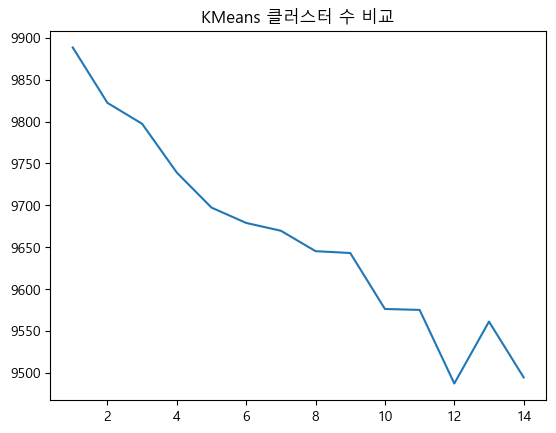

In [69]:
# 위에서 구한 값을 시각화 합니다.
# x축에는 클러스터의 수를 y축에는 inertia 값을 넣어 그립니다.

plt.plot(range(start, end), inertia)
plt.title("KMeans 클러스터 수 비교")

In [70]:
# n_clusters 에 적절한 값을 넣어줍니다.
# fit.predict 를 하고 결과를 cluster 라는 새로운 컬럼에 담습니다.
n_clusters = 10
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["cluster"] = prediction

In [71]:
# 클러스터 센터
cc = cls.cluster_centers_

In [96]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

# X_tsne = tsne.fit_transform(feature_tfidf)
X_tsne = tsne.fit_transform(feature_tfidf)
X_tsne.shape

TypeError: PCA initialization is currently not supported with the sparse input matrix. Use init="random" instead.

In [64]:
df2d = pd.DataFrame(X_tsne, columns=['x', 'y'])
df2d.shape

NameError: name 'X_tsne' is not defined

In [93]:
df2d["cluster"] = prediction
df2d.head()

,x,y,cluster
0,-352.873657,-170.971710,0
1,-69.444839,94.328384,0
2,-8.966678,-413.008331,0
3,318.607635,68.370934,0
4,148.779083,194.556396,0


/Users/jihyepark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

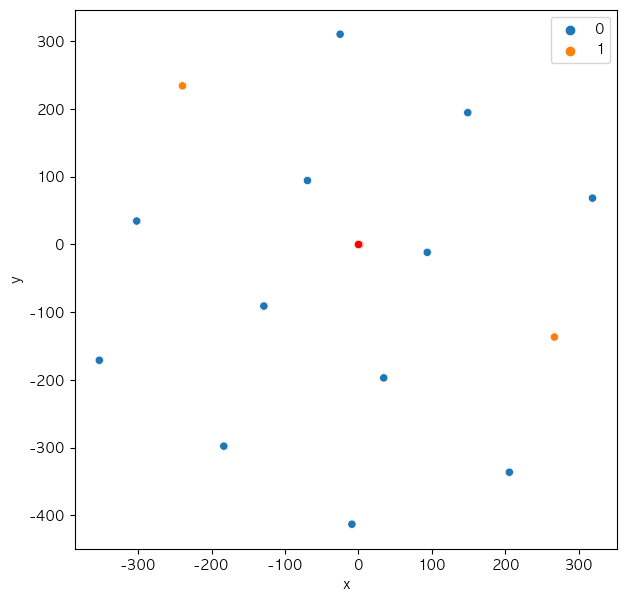

In [94]:
import seaborn as sns
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df2d, x="x", y="y", hue="cluster")
sns.scatterplot(cc[:, 0], cc[:, 1],  color='red')


In [95]:
# df["cluster"] 의 빈도수를 value_counts로 세어봅니다.
df["cluster"].value_counts().head(10)

0    12
1     2
Name: cluster, dtype: int64

MiniBatchKMeans

In [96]:
# batch_size 를 쓸 수 있는 MiniBatchKMeans 로 군집화
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
# trange 를 통해 시작과 끝 값을 지정해 주면 진행 정도를 알 수 있습니다.
# b_inertia 리스트에 cls.inertia_ 값을 넣어줍니다.
for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_tfidf)
    b_inertia.append(cls.inertia_)


100%|██████████| 14/14 [00:00<00:00, 25.83it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

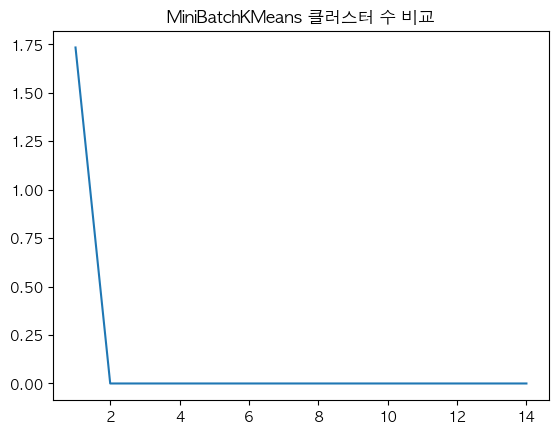

In [97]:
# 위에서 구한 값을 시각화 합니다.
# x축에는 클러스터의 수를 y축에는 b_inertia 값을 넣어 그립니다.
plt.plot(range(start, end), b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [98]:
# MiniBatchKMeans 를 통해 학습을 시킵니다.
# 결과를 bcluster 라는 변수에 저장합니다.
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_tfidf)
prediction = cls.predict(feature_tfidf)
df["bcluster"] = prediction

In [99]:
# bcluster의 빈도수를 구합니다.
df["bcluster"].value_counts().head(10)

0    12
1     2
Name: bcluster, dtype: int64

In [101]:
# 어떤 댓글이 있는지 특정 클러스터의 값을 봅니다.  
df.loc[df["bcluster"] == 21, "comment"].value_counts().head(1)


Series([], Name: comment, dtype: int64)

In [103]:
# bcluster, cluster, course 값을 미리보기 합니다.
df.loc[df["bcluster"] == 21, ["bcluster", "cluster", "comment"]]

,bcluster,cluster,comment


In [107]:
df.loc[df["bcluster"] == 24, ["bcluster", "cluster", "origin_comment", "comment"]].tail(10)

,bcluster,cluster,origin_comment,comment


# 클러스터 예측 정확도 판별하기

In [84]:
# n_clusters 위에서 정의한 클러스터 수를 사용
feature_array = feature_vector.toarray()
# 예측한 클러스터의 유니크 값
labels = np.unique(prediction)
df_cluster_score = []
df_cluster = []
for label in labels:
    id_temp = np.where(prediction==label) # 예측한 값이 클러스터 번호와 매치 되는 것을 가져옴
    x_means = np.mean(feature_array[id_temp], axis = 0) # 클러스터의 평균 값을 구함
    sorted_means = np.argsort(x_means)[::-1][:n_clusters] # 값을 역순으로 정렬해서 클러스터 수 만큼 가져옴
    features = vectorizer.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means] 
    # 클러스터별 전체 스코어
    df_score = pd.DataFrame(best_features, columns = ['features', 'score'])
    df_cluster_score.append(df_score)
    # 클러스터 대표 키워드
    df_cluster.append(best_features[0])

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [110]:
# 개별 클러스터에서 점수가 가장 높은 단어를 추출 아래 점수가 클수록 예측 정확도가 높음
# MiniBatchKMeans 로 예측한 값 기준
pd.DataFrame(df_cluster, columns = ['features', 'score']).sort_values(by=["features", "score"], ascending=False)

,features,score
1,후회가 마니 남네요 이좋은 추억송이라도 들으면서,1.0
0,후회가 마니 남네요 이좋은 추억송이라도 들으면서,0.0


In [111]:
#  score 정확도가 1이 나온 클러스터를 찾아봄 - 같은 단어끼리 묶였는지 확인 함
df.loc[df["bcluster"] == 28, ["bcluster", "cluster", "origin_comment", "comment"]]

,bcluster,cluster,origin_comment,comment


In [81]:
# !pip install wordcloud
import wordcloud

In [82]:
# 불용어 - 자주 등장하지만 의미가 크지 않아 제외하고 싶은 텍스트
stopwords = ["의", "입니다","영화","10점","0점"]
# 불용어를 제거하지 않고 그리려면 아래 주석을 풀어서 stopword 변수에 덮어쓰기를 합니다.
# stopwords = []
# displayWordCloud 라는 함수를 만들어 재사용합니다.
from wordcloud import WordCloud


def displayWordCloud(data = None, backgroundcolor = 'black', width=1280, height=768):
    wordcloud = WordCloud(
                        # family='NanumBarunGothic',
                        font_path = '/Library/Fonts/AppleGothic.ttf',
                        # family="AppleGothic",
                        stopwords = stopwords, 
                        background_color = backgroundcolor, 
                        width = width, height = height, 
                        random_state=42).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [83]:
course_text = " ".join(df["document"])
displayWordCloud(course_text)

OSError: cannot open resource